In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset=pd.read_csv("news.csv",index_col=None)
dataset

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
dataset=dataset.drop("Unnamed: 0",axis=1)

In [4]:
y=dataset['label']
x=dataset['text']

In [5]:
tfid_vector=TfidfVectorizer()
x_count=tfid_vector.fit_transform(x)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_count,y,test_size=0.3,random_state=42)

In [7]:
pac=PassiveAggressiveClassifier()
pac_model=pac.fit(x_train,y_train)
y_pred=pac_model.predict(x_test)

In [8]:
clf=classification_report(y_test,y_pred,labels=['FAKE','REAL'])
print("PassiveAggressiveclassifier model")
print(clf)

PassiveAggressiveclassifier model
              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       968
        REAL       0.94      0.94      0.94       933

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



In [9]:
con_matrix=confusion_matrix(y_test,y_pred)
print(con_matrix)

[[908  60]
 [ 55 878]]


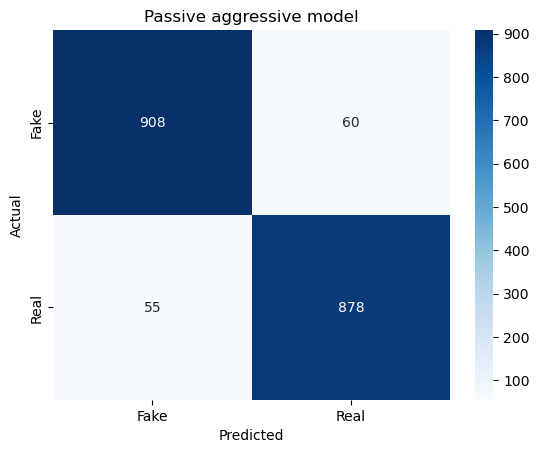

In [10]:
sb.heatmap(con_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Fake", "Real"],yticklabels=["Fake", "Real"])
plt.title("Passive aggressive model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
MNB=MultinomialNB()
MNB_model=MNB.fit(x_train,y_train)
y_pred=MNB_model.predict(x_test)

In [12]:
clf=classification_report(y_test,y_pred,labels=['FAKE','REAL'])
print("MultinomialNB model")
print(clf)

MultinomialNB model
              precision    recall  f1-score   support

        FAKE       0.99      0.56      0.71       968
        REAL       0.68      0.99      0.81       933

    accuracy                           0.77      1901
   macro avg       0.83      0.77      0.76      1901
weighted avg       0.84      0.77      0.76      1901



In [13]:
con_matrix=confusion_matrix(y_test,y_pred)
print(con_matrix)

[[539 429]
 [  8 925]]


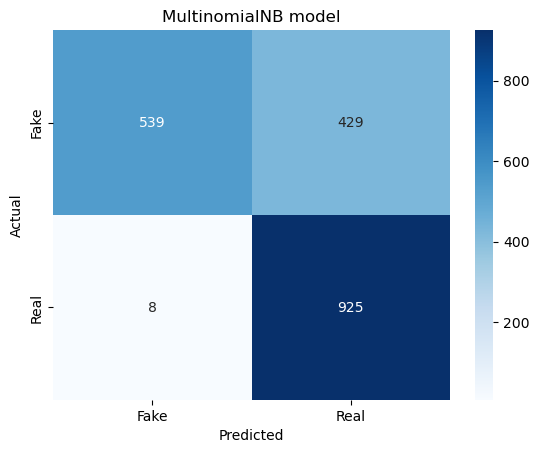

In [14]:
sb.heatmap(con_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Fake", "Real"],yticklabels=["Fake", "Real"])
plt.title("MultinomialNB model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Passive aggressive model works better